# Data Mining Assignment One

## Visit the UCI Irvine Machine Learning Dataset Repository or Kaggle and select a dataset of your choice.
1. Load the dataset into Jupyter Notebook.
2. Look for the shape of the data.
3. Describe the data quantitatively.
4. Perform thorough data cleaning of the dataset.
5. Select 7 variables of interest to work with.
6. Plot boxplots to identify whether we have outliers.
7. Remove the outliers and plot new boxplots to see the results.
8. Describe the results seen in the boxplots.
9. In around 200 words, describe the steps you have used in summary (in Markdown).

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Airlines Reviews and Rating.csv')
data

,Aircraft Type,Users Reviews,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
0,NaN,✅Trip Verified| Cancelled our flight last-min...,United Kingdom,Couple Leisure,London Heathrow to Tokyo,Economy Class,1.0,Sep-23,1.0,2.0,1.0,NaN,3.0,1,no
1,NaN,"✅Trip Verified| I had a flight from Miami, Flo...",United States,Solo Leisure,Miami to Dublin via London Heathrow,Business Class,1.0,Aug-23,3.0,1.0,2.0,1.0,1.0,1,no
2,NaN,✅Trip Verified| We started our day with BA in...,United States,Business,Prague to San Francisco via London,Business Class,1.0,Sep-23,3.0,1.0,3.0,1.0,NaN,1,no
3,NaN,✅Trip Verified| I fly British Airways weekly ...,United Kingdom,Business,London to Glasgow,Economy Class,1.0,Sep-23,1.0,1.0,1.0,1.0,1.0,1,no
4,NaN,Not Verified| Everything was ok until our con...,France,Family Leisure,San Diego to Marseille via London,Economy Class,3.0,Aug-23,2.0,1.0,3.0,1.0,3.0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,NaN,LAX to LHR - 25 Oct 2014. I agree with other r...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,2.0,NaN,1.0,NaN,3.0,2,no
3286,NaN,Toronto to London Heathrow - 26/10/14. After r...,United Kingdom,NaN,NaN,Business Class,4.0,NaN,5.0,NaN,5.0,NaN,5.0,4,yes
3287,NaN,I have after years of loyalty finally had it w...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,1.0,NaN,1.0,NaN,2.0,1,no
3288,NaN,Traveled with British Airways ORD-LHR last mon...,United States,NaN,NaN,Business Class,5.0,NaN,5.0,NaN,4.0,NaN,4.0,4,yes


In [100]:
print('Rows:', data.shape[0], '| Columns:', data.shape[1])

Rows: 3290 | Columns: 15


In [102]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft Type           1896 non-null   object 
 1   Users Reviews           3290 non-null   object 
 2   Country                 3289 non-null   object 
 3   Type_of_Travellers      2887 non-null   object 
 4   Route                   2883 non-null   object 
 5   Seat_Types              3287 non-null   object 
 6   Seat Comfort            3176 non-null   float64
 7   Date Flown              2880 non-null   object 
 8   Cabin Staff Service     3165 non-null   float64
 9   Ground Service          2812 non-null   float64
 10  Food & Beverages        2911 non-null   float64
 11  Wifi & Connectivity     592 non-null    float64
 12  Inflight Entertainment  2171 non-null   float64
 13  Value For Money         3290 non-null   int64  
 14  Recommended             3290 non-null   

In [104]:
print(data.describe())

       Seat Comfort  Cabin Staff Service  Ground Service  Food & Beverages  \
count   3176.000000          3165.000000     2812.000000       2911.000000   
mean       2.833123             3.228752        2.795519          2.678461   
std        1.360588             1.486388        1.455301          1.435562   
min        1.000000             1.000000        1.000000          0.000000   
25%        2.000000             2.000000        1.000000          1.000000   
50%        3.000000             3.000000        3.000000          3.000000   
75%        4.000000             5.000000        4.000000          4.000000   
max        5.000000             5.000000        5.000000          5.000000   

       Wifi & Connectivity  Inflight Entertainment  Value For Money  
count           592.000000             2171.000000      3290.000000  
mean              1.923986                2.654537         2.636474  
std               1.355305                1.386722         1.459832  
min              

In [106]:
print(data.isnull().sum())

Aircraft Type             1394
Users Reviews                0
Country                      1
Type_of_Travellers         403
Route                      407
Seat_Types                   3
Seat Comfort               114
Date Flown                 410
Cabin Staff Service        125
Ground Service             478
Food & Beverages           379
Wifi & Connectivity       2698
Inflight Entertainment    1119
Value For Money              0
Recommended                  0
dtype: int64


In [126]:
data.duplicated

<bound method DataFrame.duplicated of      Aircraft Type                                      Users Reviews  \
0              NaN  ✅Trip Verified|  Cancelled our flight last-min...   
1              NaN  ✅Trip Verified| I had a flight from Miami, Flo...   
2              NaN  ✅Trip Verified|  We started our day with BA in...   
3              NaN  ✅Trip Verified|  I fly British Airways weekly ...   
4              NaN  Not Verified|  Everything was ok until our con...   
...            ...                                                ...   
3285           NaN  LAX to LHR - 25 Oct 2014. I agree with other r...   
3286           NaN  Toronto to London Heathrow - 26/10/14. After r...   
3287           NaN  I have after years of loyalty finally had it w...   
3288           NaN  Traveled with British Airways ORD-LHR last mon...   
3289           NaN  Travelled to Palma in new BA 'sardine' busines...   

             Country Type_of_Travellers                                Route  \
0    

In [200]:
VariableOfInterest=data.drop_duplicates()[['Seat Comfort', 'Cabin Staff Service', 'Ground Service', 'Food & Beverages', 'Recommended',  'Seat_Types', 'Value For Money']]
VariableOfInterest

,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Recommended,Seat_Types,Value For Money
0,1.0,1.0,2.0,1.0,no,Economy Class,1
1,1.0,3.0,1.0,2.0,no,Business Class,1
2,1.0,3.0,1.0,3.0,no,Business Class,1
3,1.0,1.0,1.0,1.0,no,Economy Class,1
4,3.0,2.0,1.0,3.0,no,Economy Class,3
...,...,...,...,...,...,...,...
3285,3.0,2.0,NaN,1.0,no,Business Class,2
3286,4.0,5.0,NaN,5.0,yes,Business Class,4
3287,3.0,1.0,NaN,1.0,no,Business Class,1
3288,5.0,5.0,NaN,4.0,yes,Business Class,4


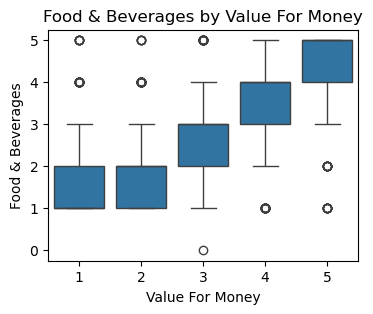

In [214]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=VariableOfInterest['Value For Money'], y=VariableOfInterest['Food & Beverages'])
plt.title("Food & Beverages by Value For Money")
plt.xlabel("Value For Money")
plt.ylabel("Food & Beverages")
plt.show()

I loaded the dataset from Kaggle, I choose a dataset related to Airlines Reviews and Rating.

First, I looked to the shape of the data (how many rows and columns), then, I ran a code to understand the types of data I had on my dataset (if they're numerical or not).

After that, I ran a code to bring statistics description about numerical data on my dataset.

Then I identifyed if there was missing values but I didn't drop or fill with 0 because it would change the rate of each category since is a score which 1 is less satisfied and 5 very satisfied. The fact contains 0 could be someone who had forgot to answer that question.

Before I choose my features, I identify if there were duplicates and then I took my variables removing duplicates.

I made a box plot of "Value For Money" that means that how much you paid for the ticket if you're satisfied or not on axis versus "Food & Beverages".

As you can see, the values are proportional, if you gave 5 rating for Value For Money the Food & Beverages is probably 5 as well but there are a couple of outliers and if I cut from my analysis it'll be wrong.

Since this dataset is related to review and rating (opinion) is important to show outliers in this scenario to understand what had happened to someone who were very satisfied with the value but not with food.